<font color=#ff00ff size=5 face="黑体"> 首先请提前阅读本次实验的实验目的、实验内容、实验环境、实验原理和实验步骤；接着按照下面的笔记和要求，运行代码，并编写自己的代码；在实验的过程中，请把碰到的问题，解决方案，心得等等做好笔记。</font>

### 通过了解古登堡计划(最古老的数字图书馆)，学习如何进行简单地文本处理。
### Project Gutenberg: http://www.gutenberg.org/

<font color=#0000ff size=5 face="黑体"> 准备数据</font>

1) 解压文件 Books_GerPort.zip 和 Books_EngFr.zip；

2) 把解压后的两个文件夹中的所有文件和目录移动到一个新的目录中，命名为 Books；

3) 在文件夹Books中，删除所有的以 .DS_Store 开头或命名的文件和文件夹。

<font color=#0000ff size=5 face="黑体"> 我们的目标是写一个函数，来统计一段文本中每个单词出现的次数，跟踪单词的最好的实现方式是什么？</font>

In [225]:
# Python dictionaries are a very natural choice；
# the keys are the words containing in the input text;
# all words are transformed into lowercase;
# the values are numbers indicating how many times each word appears in the text;

# create a function named count_words with a parameter text;
# the function return a dictionary named word_counts;
import string
def count_words(text):
    """
    Count the number of times each word occurs in text(str). Return dictionary where keys are unique
    words and values are word counts. Skip punctuation(.,;:'"). Change all the character into lowercase.
    """
    # your code is here
    count=0
    for mark in '.,;:\'\"':
        text=text.replace(mark,'')
    text=text.lower()
    textlist=text.split(' ')
    word_counts={}
    
    for word in textlist:
        if word in word_counts: #如果在 则加一
            word_counts[word]=word_counts[word]+1
        else: #如果不在则创建，初始化
            word_counts[word]=1
    return word_counts
            
        
        
    

    




    
    
    
    

<font color=#ff0000 size=5 face="黑体">在上面函数的实现过程中，会存在一种情况，比如don't， we're这样的缩写，在删除了所有的标点符号后，就会变为dont,were。为了简单，我们不做过多地处理，认为删除标点符号之后的dont,were就是一个单词。</font>

In [226]:
# counting words
text = "This is my test text. We're keeping this text short to keep things manageable."
print(count_words(text))

{'this': 2, 'is': 1, 'my': 1, 'test': 1, 'text': 2, 'were': 1, 'keeping': 1, 'short': 1, 'to': 1, 'keep': 1, 'things': 1, 'manageable': 1}


<font color=#0000ff size=5 face="黑体"> 学习怎样使用模块collections中的Counter来实现相同的任务</font>

In [227]:
from collections import Counter

def count_words_fast(text):
    """
    Count the number of times each word occurs in text(str). Return dictionary where keys are unique
    words and values are word counts.Skip punctuation(.,;:'"). Change all the character into lowercase. 
    """
    # copy a part of lines from the function you defined above
    for mark in '.,;:\'\"':
        text=text.replace(mark,'')
    text=text.lower()
    # code for creating the dictionary can be replaced by the following line
    word_counts = Counter(text.split(" ")) 
    return word_counts

In [228]:
count_words_fast(text)

Counter({'this': 2,
         'is': 1,
         'my': 1,
         'test': 1,
         'text': 2,
         'were': 1,
         'keeping': 1,
         'short': 1,
         'to': 1,
         'keep': 1,
         'things': 1,
         'manageable': 1})

In [229]:
count_words(text) == count_words_fast(text)

True

<font color=#0000ff size=5 face="黑体"> 学习怎样通过文件路径来获取文件的内容</font>

In [230]:
# define a fuction named read_book, with a parameter title_path which is the path of a book;
# the function will read the content of a book as a string;
# then remove the "\n" and "\r" in the string and return the string;
# in order to process the certain characters in file path, we need to 
# add encoding='utf8' in open()
def read_book(title_path):
    """
    Read a book and return it as a string.
    """
    # your code is here
    f=open(title_path,'r',encoding='utf8')
    content=f.read().replace('\r','').replace('\n','').strip()
    f.close()
    return content
    
    
    

In [231]:
# try reading in Shakespeare's Romeo and Juliet
text = read_book("./Books/Books_EngFr/English/shakespeare/Romeo and Juliet.txt")

In [232]:
len(text) # 169275

169275

In [233]:
# there's a famous line in Romeo and Juliet: What's in a name?
# Let's see if we can find its index from text;
# set the value to ind
ind=text.index("What's in a name?")
print(ind)
# print ind 
# 42757 is the result


42757


In [234]:
# extract a sample text named sample_text from text;
# sample_text contains 1,000 characters from ind.
sample_text=text[ind:ind+1000]
# print sample_text
print(sample_text)

What's in a name? That which we call a rose    By any other name would smell as sweet.    So Romeo would, were he not Romeo call'd,    Retain that dear perfection which he owes    Without that title. Romeo, doff thy name;    And for that name, which is no part of thee,    Take all myself.  Rom. I take thee at thy word.    Call me but love, and I'll be new baptiz'd;    Henceforth I never will be Romeo.  Jul. What man art thou that, thus bescreen'd in night,    So stumblest on my counsel?  Rom. By a name    I know not how to tell thee who I am.    My name, dear saint, is hateful to myself,    Because it is an enemy to thee.    Had I it written, I would tear the word.  Jul. My ears have yet not drunk a hundred words    Of that tongue's utterance, yet I know the sound.    Art thou not Romeo, and a Montague?  Rom. Neither, fair saint, if either thee dislike.  Jul. How cam'st thou hither, tell me, and wherefore?    The orchard walls are high and hard to climb,    And the place death, conside

<font color=#0000ff size=5 face="黑体"> 学习怎样统计单词的频率</font>

In [235]:
# define a function named word_statistics with a parameter word_counts;
# word_counts is a dictionary which is returned by the previous function count_words or count_words_fast;
# the function return a tuple: (the number of unique words, the frequency of these unique words)
# complete this function

def word_statistics(word_counts):
    """
    Return number of unique words and word frequencies.
    """
    # the number of unique words
    num_unique = len(word_counts)
    # the frequency of each unique words, invoke values()
    counts = word_counts.values()
    return (num_unique,counts)

In [236]:
# reading the book Romeo and Juliet
text = read_book("./Books/Books_EngFr/English/shakespeare/Romeo and Juliet.txt")
# count the words
word_counts = count_words_fast(text)
# return the number of unique words and the word frequencies
(num_unique,counts) = word_statistics(word_counts)
print(num_unique,sum(counts)) # (5118, 40776)

5118 40776


In [237]:
num_unique

5118

In [238]:
# print how many words there are in total
sum(counts)

40776

In [239]:
# reading the book Romeo and Juliet in German dictionary

# count the words

# return the number of unique words and the word frequencies

print(num_unique,sum(counts)) # (7527,20311)

5118 40776


<font color=#0000ff size=5 face="黑体"> 学习怎样浏览文件目录并且一次性读取多个文件</font>

In [240]:
import os
book_dir = "./Books"
os.listdir(book_dir)

['Books_EngFr']

In [241]:
os.listdir(book_dir+"/"+'Books_EngFr/English')

['shakespeare']

In [242]:
os.listdir(book_dir+"/"+'Books_EngFr/English'+"/"+'shakespeare')

['Othello.txt',
 'Richard III.txt',
 'The Merchant of Venice.txt',
 "A Midsummer Night's Dream.txt",
 'Macbeth.txt',
 'Hamlet.txt',
 'Romeo and Juliet.txt']

In [244]:
# call the loop variable language to print all the books in the dictionary Books

# the first for loop is looping over languages
# the second for loop is looping over authors
# the third, the innermost for loop, is looping over different titles, different books.
# print the path of each book
# record the number of unique words and the word frequencies of each book as (num_unique,counts)
for language in os.listdir(book_dir+"/"+"Books_EngFr/"):  # 将（）中的参数补充完整
    for author in os.listdir(book_dir+"/"+"Books_EngFr/"+"/"+language):  #将（）中的参数补充完整
        for title in os.listdir(book_dir+"/"+"Books_EngFr/"+"/"+language+"/"+author):  #将（）中的参数补充完整
            inputfile = book_dir+"/"+"Books_EngFr/"+"/"+language+"/"+author+"/"+title   # 给inputfile赋值
            text = read_book(inputfile)
            (num_unique,counts) = word_statistics(count_words_fast(text))

<font color=#0000ff size=5 face="黑体"> 学习怎样使用Pandas库来建立多维结构化的数据</font>

pandas库是一个强大的工具,它有两种主要的数据结构: Series和DataFrame

Series是一种类似与一维数组的对象，它由一组数据以及一组与之相关的数据便签（即索引）组成，仅由一组数据即可产生最简单的Series。

DataFrame是一个表格型数据，含有一组有序的列，每一列可以是不同的类型值。DataFrame可以看成是由多个Series组成的字典，它们共用一个索引。

参考：[10 Minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html)

In [245]:
import pandas as pd

In [246]:
# DataFrame.loc[]: Access a group of rows and columns by label(s) or a boolean array.
stats = pd.DataFrame(columns = ("language","author","title","length","unique"))
title_num = 1            


for language in os.listdir(book_dir+"/"+"Books_EngFr/"):  # 将（）中的参数补充完整
    for author in os.listdir(book_dir+"/"+"Books_EngFr/"+"/"+language):  #将（）中的参数补充完整
        for title in os.listdir(book_dir+"/"+"Books_EngFr/"+"/"+language+"/"+author):  #将（）中的参数补充完整
            inputfile = book_dir+"/"+"Books_EngFr/"+"/"+language+"/"+author+"/"+title #将（）中的参数补充完整
            text = read_book(inputfile)
            (num_unique,counts) = word_statistics(count_words_fast(text))
            #  insert a row to a dataframe
            stats.loc[title_num] = language, author, title, sum(counts), num_unique 
            title_num += 1

In [247]:
stats

,language,author,title,length,unique
1,German,schiller,Wallensteins Lager.txt,15443,4379
2,German,schiller,die braut von messina.txt,26482,6655
3,German,schiller,"Der Parasit, oder die Kunst, sein GlÅck zu ma...",20450,6159
4,German,schiller,Die Verschwîrung des Fiesco zu Genua.txt,31128,10371
5,German,schiller,Kabale und Liebe.txt,30929,9969
6,German,schiller,Die Huldigung der KÅnste.txt,3919,1730
7,German,schiller,Der Neffe als Onkel.txt,14349,4416
8,German,schiller,Die Piccolomini.txt,35456,6763
9,German,schiller,Die Jungfrau von Orleans.txt,24181,8806
10,German,schiller,"Turandot, Prinzessin von China.txt",21441,7550


<font color=#0000ff size=4 face="黑体">对上面创建表格数据的代码作微小的改动，使得</font>

1）作者姓名的首字母大写

2）书名中没有.txt

In [248]:
# DataFrame.loc[]: Access a group of rows and columns by label(s) or a boolean array.
stats = pd.DataFrame(columns = ("language","author","title","length","unique"))
title_num = 1            


for language in os.listdir(book_dir+"/"+"Books_EngFr/"):  # 将（）中的参数补充完整
    for author in os.listdir(book_dir+"/"+"Books_EngFr/"+"/"+language):  #将（）中的参数补充完整
        for title in os.listdir(book_dir+"/"+"Books_EngFr/"+"/"+language+"/"+author):  #将（）中的参数补充完整
            inputfile = book_dir+"/"+"Books_EngFr/"+"/"+language+"/"+author+"/"+title
            text = read_book(inputfile)
            (num_unique,counts) = word_statistics(count_words_fast(text))
            stats.loc[title_num] =  language, author.capitalize(), title.strip('.txt'), sum(counts), num_unique  # 补充完整赋值号右边
            title_num += 1

In [249]:
stats

,language,author,title,length,unique
1,German,Schiller,Wallensteins Lager,15443,4379
2,German,Schiller,die braut von messina,26482,6655
3,German,Schiller,"Der Parasit, oder die Kunst, sein GlÅck zu ma...",20450,6159
4,German,Schiller,Die Verschwîrung des Fiesco zu Genua,31128,10371
5,German,Schiller,Kabale und Liebe,30929,9969
6,German,Schiller,Die Huldigung der KÅnste,3919,1730
7,German,Schiller,Der Neffe als Onkel,14349,4416
8,German,Schiller,Die Piccolomini,35456,6763
9,German,Schiller,Die Jungfrau von Orleans,24181,8806
10,German,Schiller,"Turandot, Prinzessin von China",21441,7550


<font color=#0000ff size=5 face="黑体"> 怎样查看一个名为stats的DataFrame中前几行和后几行的数据？</font>

In [250]:
# head([n])：Return the first n rows. If n is not given, it returns the top five lines
stats.head()

,language,author,title,length,unique
1,German,Schiller,Wallensteins Lager,15443,4379
2,German,Schiller,die braut von messina,26482,6655
3,German,Schiller,"Der Parasit, oder die Kunst, sein GlÅck zu ma...",20450,6159
4,German,Schiller,Die Verschwîrung des Fiesco zu Genua,31128,10371
5,German,Schiller,Kabale und Liebe,30929,9969


In [251]:
stats.head(8)

,language,author,title,length,unique
1,German,Schiller,Wallensteins Lager,15443,4379
2,German,Schiller,die braut von messina,26482,6655
3,German,Schiller,"Der Parasit, oder die Kunst, sein GlÅck zu ma...",20450,6159
4,German,Schiller,Die Verschwîrung des Fiesco zu Genua,31128,10371
5,German,Schiller,Kabale und Liebe,30929,9969
6,German,Schiller,Die Huldigung der KÅnste,3919,1730
7,German,Schiller,Der Neffe als Onkel,14349,4416
8,German,Schiller,Die Piccolomini,35456,6763


In [252]:
# tail([n]): Return the last n rows.If n is not given, it returns the bottom five lines
stats.tail()

,language,author,title,length,unique
98,French,Sand,La Marquise,14716,4786
99,French,Sand,L' Orco,8748,3162
100,French,Sand,Mattea,21089,6429
101,French,Sand,Metella,19600,5715
102,French,Sand,Oeuvres illustrÇes de George Sand,23210,7503


In [253]:
stats.tail(3)

,language,author,title,length,unique
100,French,Sand,Mattea,21089,6429
101,French,Sand,Metella,19600,5715
102,French,Sand,Oeuvres illustrÇes de George Sand,23210,7503


<font color=#0000ff size=5 face="黑体"> 学习怎样使用matplotlib.pyplot画出书籍的长度和单词频率统计图。</font>

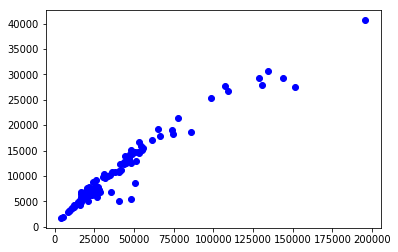

In [254]:
# The matplotlib.pyplot module contains functions that allow you to generate many kinds of plots quickly
import matplotlib.pyplot as plt
plt.plot(stats.length,stats.unique,"bo")
plt.show()

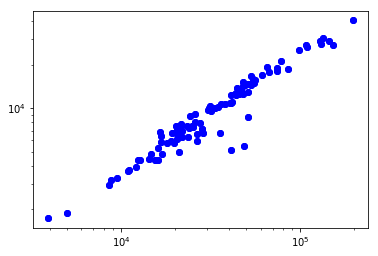

In [255]:
# use the loglog version, which plots both x and y-axis logarithmically.
plt.plot(stats.length,stats.unique,"bo")
plt.loglog(stats.length,stats.unique,"bo")
plt.show()

In [256]:
# look at these elements for which language is equal to English
stats[stats.language == "English"]

,language,author,title,length,unique
35,English,Shakespeare,Othello,26590,5898
36,English,Shakespeare,Richard III,48315,5449
37,English,Shakespeare,The Merchant of Venice,20949,4978
38,English,Shakespeare,A Midsummer Night's Dream,16103,4345
39,English,Shakespeare,Macbeth,16874,4780
40,English,Shakespeare,Hamle,28551,6776
41,English,Shakespeare,Romeo and Julie,40776,5118


In [257]:
# look at these elements for which language is equal to French


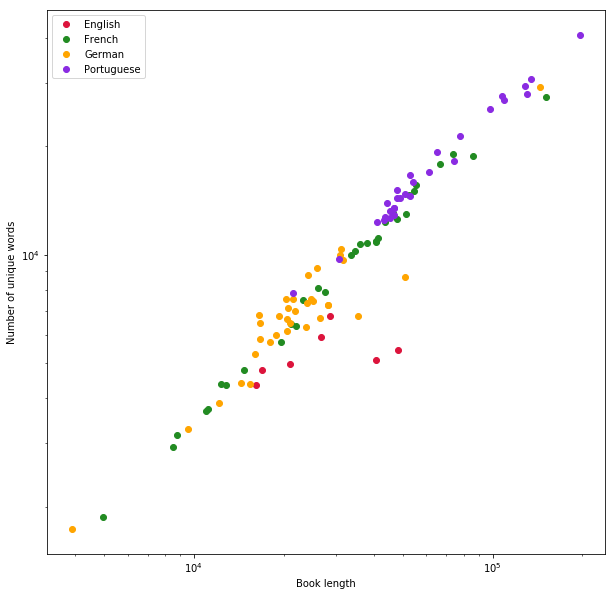

In [258]:
# construct a plot using different colors for different language
# plt using the same names for colors as HTML does.
plt.figure(figsize=(10,10))
subset = stats[stats.language == "English"]
plt.loglog(subset.length,subset.unique,"o",label="English",color="crimson")

subset = stats[stats.language == "French"]
plt.loglog(subset.length,subset.unique,"o",label="French",color="forestgreen")

subset = stats[stats.language == "German"]
plt.loglog(subset.length,subset.unique,"o",label="German",color="orange")

subset = stats[stats.language == "Portuguese"]
plt.loglog(subset.length,subset.unique,"o",label="Portuguese",color="blueviolet")

plt.legend()
plt.xlabel("Book length")
plt.ylabel("Number of unique words")
plt.savefig("lang_plot.pdf")
plt.show()